In [1]:
print("Om Namah Shivaya")

Om Namah Shivaya


A-NEGATIVE 11
AB-NEGATIVE 6
A-POSITIVE 285
AB-POSITIVE 66
O-NEGATIVE 23
O-POSITIVE 469
B-NEGATIVE 16
B-POSITIVE 274
{'AB-POSITIVE': 0, 'O-POSITIVE': 1, 'B-POSITIVE': 2, 'A-POSITIVE': 3, 'B-NEGATIVE': 4, 'O-NEGATIVE': 5, 'A-NEGATIVE': 6, 'AB-NEGATIVE': 7}
23
274
469
285
66
11
16
6
[[5.00000000e+00]
 [2.00000000e+00]
 [1.00000000e+00]
 [3.00000000e+00]
 [6.66133815e-16]
 [6.00000000e+00]
 [4.00000000e+00]
 [7.00000000e+00]]


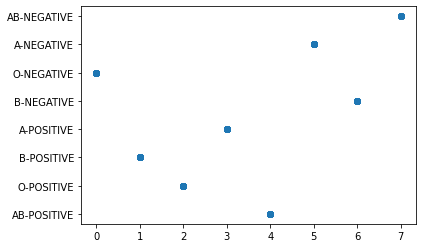

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

df = pd.read_excel('master_blood.xlsx')
df['Mobile'] = df['Mobile'].apply(str)
df['Wt.'] = df['Wt.'].apply(str)
df['Hb%'] = df['Hb%'].apply(str)

a = list(df['BLOOD GROUP'])
b = set(df['BLOOD GROUP'])
for i in b:
    print(i,end=" ")
    print(a.count(i))
    
arr = df['BLOOD GROUP']

label = {k:i for i, k in enumerate(df['BLOOD GROUP'].unique(),0)}
arr = arr.map(label)
print(label)

#plt.scatter(df['S No'],df['BLOOD GROUP'],cmap='rgb')

cn = {}
kmeans = KMeans(n_clusters=8)
arr = np.array(arr)
arr = arr.reshape(-1,1)
kmeans.fit(arr)
for i in set(kmeans.labels_):    
    #for i in set(kmeans.labels_):
    temp=[]
    tem = round(kmeans.cluster_centers_[i][0])
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            #print(j,end = " ")
            temp.append(j)
    cn[tem] = temp
    print(len(temp))

print(kmeans.cluster_centers_)

plt.scatter(kmeans.labels_,df['BLOOD GROUP'])

In [11]:
def string(lm):
    s = ''
    for i in lm:
        if isinstance(i,str):
            s = s +'\n'+ i
    return s
    

def getDetails(n):
    lm = []
    count =0 
    import datetime
    for j in n:
        if(df['Count'][j]==0):
            lm.append(string(df.iloc[j]))
            count+=1
            if count == 3:
                break
    for i in n:    
        if df['Remarks'][i]==0 and df['Remarks'][i]=='TAB TAKEN' or df['Remarks'][i]=='FEVER':
            lm.append(string(df.iloc[i]))
            count+=1
            if count == 3:
                break
    for i in n:    
        d1 = datetime.datetime.now().date()
        t = ( df['Last'][i].date())
        delta = d1-t
        #print(delta.days)
        if delta.days > 180:
            lm.append(string(df.iloc[i]))
            count+=1
            if count == 5:
                break
    return lm

def get(i):
    if i in ['O-POSITIVE','O+','o+','O POSITIVE','o positive']:
        return(getDetails(cn[1]))
    if i in ['O-NEGATIVE','O-','o-','O NEGATIVE','o negative']:
        return(getDetails(cn[5]))
    if i in ['A-POSITIVE','A+','a+','A POSITIVE','a positive']:
        return(getDetails(cn[3]))
    if i in ['B-POSITIVE','B+','b+','B POSITIVE','b positive']:
        return(getDetails(cn[2]))
    if i in ['AB-POSITIVE','AB+','ab+','AB POSITIVE','ab negative']:
        return(getDetails(cn[-0]))
    if i in ['B-NEGATIVE','B-','b-','B NEGATIVE','b negative']:
        return(getDetails(cn[4]))
    if i in ['A-NEGATIVE','A-','a-','A NEGATIVE','a negative']:
        return(getDetails(cn[6]))
    if i in ['AB-NEGATIVE','AB-','ab-','AB NEGATIVE']:
        return(getDetails(cn[7]))
            


In [12]:
get('o-')

['\nMr.SHIVAKUMAR M\n#1716 2ND CROSS CHIKKAVAKKALAGERI LASHKAR MOHALLA MYSURU\n19/M\n65.0\n17\n120/70\nO-NEGATIVE\n6362537279.0\nREPLACEMENT\nNot Done',
 '\nMr.APPU\n#26 HOOTAGALLI KHB COLONY ,MYSURU\n28/M\n16.3\n16.3\n110/70\nO-NEGATIVE\n8884268561.0\nREPLACEMENT\nScreening Test done',
 '\nMr.SANTHOSH KV\n#1728 SRI RAM PURA 2ND STAGE ,MYSURU\n23/M\n81.0\n15.6\n120/80\nO-NEGATIVE\n8147832741.0\nREPLACEMENT\nScreening Test done',
 '\nMr.RAMESHA\nKONURU V&P NANJANDUDU TQ ,MYSURU\n30/M\n71.0\n16.7\n110/70\nO-NEGATIVE\n8722594101.0\nREPLACEMENT\nScreening Test done',
 '\nMr.Bv abhishek sundara raman\nJSS MEDICAL COLLEGE MENS HOSTEL BANNIMANTAP ,MYSURU\n22/M\n65.0\n17.9\n120/80\nO-NEGATIVE\n973836090.0\nVOLUNTARY\nScreening Test done']